In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv("R:/Downloadd/Admission_Predict.csv")

In [4]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data = data.drop("Serial No.",axis =1)

In [6]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


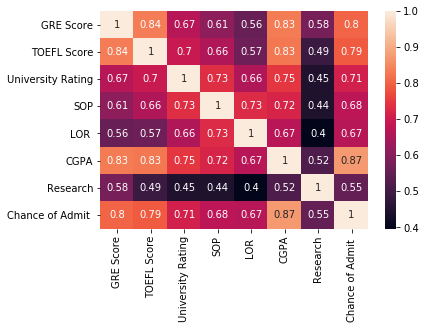

In [8]:
sns.heatmap(data.corr(),annot = True)

In [9]:
data = data.drop("TOEFL Score",axis = 1)

In [10]:
data.head()

,GRE Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,4,4.5,4.5,9.65,1,0.92
1,324,4,4.0,4.5,8.87,1,0.76
2,316,3,3.0,3.5,8.00,1,0.72
3,322,3,3.5,2.5,8.67,1,0.80
4,314,2,2.0,3.0,8.21,0,0.65


In [11]:
data.isnull().sum()

GRE Score            0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [12]:
x = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y)

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [15]:
model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
ypred = model.predict(xtest)

In [17]:
ypred

array([0.79811775, 0.85788546, 0.74376223, 0.95703789, 0.7201273 ,
       0.53269065, 0.69046525, 0.68396819, 0.52911922, 0.9297321 ,
       0.73388679, 0.87460644, 0.73296687, 0.82717315, 0.67150508,
       0.61149869, 0.79549253, 0.88169344, 0.80336639, 0.77527504,
       0.58541474, 0.84216393, 0.70668686, 0.77473893, 0.60057025,
       0.52759714, 0.52009068, 0.6933341 , 0.70939572, 0.65810571,
       0.84939253, 0.62984091, 0.46886093, 0.65868865, 0.74740886,
       0.55445164, 0.82876044, 0.73533107, 0.91209938, 0.67077236,
       0.77916421, 0.77932731, 0.87422755, 0.54880254, 0.55532818,
       0.71961634, 0.76139901, 0.59955363, 0.84922053, 0.80504312,
       0.74963717, 0.6711479 , 0.62185384, 0.51590105, 0.84073724,
       0.56413922, 0.74016755, 0.85427792, 0.62307006, 0.61650095,
       0.901962  , 0.67567636, 0.77938169, 0.77715771, 0.83201349,
       0.74234046, 0.58054522, 0.8578262 , 0.43874473, 0.61119933,
       0.64443453, 0.75285259, 0.78903743, 0.77081187, 0.66969

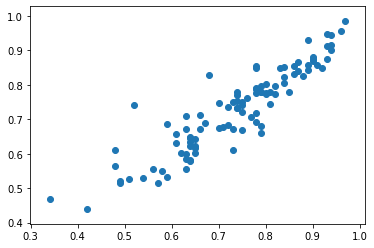

In [18]:
plt.scatter(ytest,ypred)

In [19]:
cutoff = 0.4                          # decide on a cutoff limit
y_pred_classes = np.zeros_like(ypred)    # initialise a matrix full with zeros
y_pred_classes[ypred > cutoff] = 1 

In [20]:
y_test_classes = np.zeros_like(ytest)
y_test_classes[ytest > cutoff] = 1

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_classes,y_pred_classes)

0.99

In [22]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test_classes,y_pred_classes)

array([[ 0,  1],
       [ 0, 99]], dtype=int64)

In [23]:
print(classification_report(y_test_classes,y_pred_classes))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.99      1.00      0.99        99

    accuracy                           0.99       100
   macro avg       0.49      0.50      0.50       100
weighted avg       0.98      0.99      0.99       100



C:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
